<a href="https://www.kaggle.com/code/mehrdat/drought-time-series-analysis?scriptVersionId=192709498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-drought-meteorological-data/soil_data.csv
/kaggle/input/us-drought-meteorological-data/train_timeseries/train_timeseries.csv
/kaggle/input/us-drought-meteorological-data/validation_timeseries/validation_timeseries.csv
/kaggle/input/us-drought-meteorological-data/test_timeseries/test_timeseries.csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:

train= pd.read_csv('/kaggle/input/us-drought-meteorological-data/train_timeseries/train_timeseries.csv')


test= pd.read_csv('/kaggle/input/us-drought-meteorological-data/test_timeseries/test_timeseries.csv')

data=train.copy()

In [14]:
data.head(3)

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN


In [15]:
#data.isnull().sum()


In [16]:
data=data.drop(columns=['score','fips'])
data=data.dropna()
data=data.drop_duplicates()
data.isnull().sum()


date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
dtype: int64

In [17]:
data['date']=pd.to_datetime(data['date'])
data=data.set_index('date')
data.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
date,,,,,,,,,,,,,,,,,,
2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81
2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41
2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66
2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58
2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19


# The most important features


<Axes: >

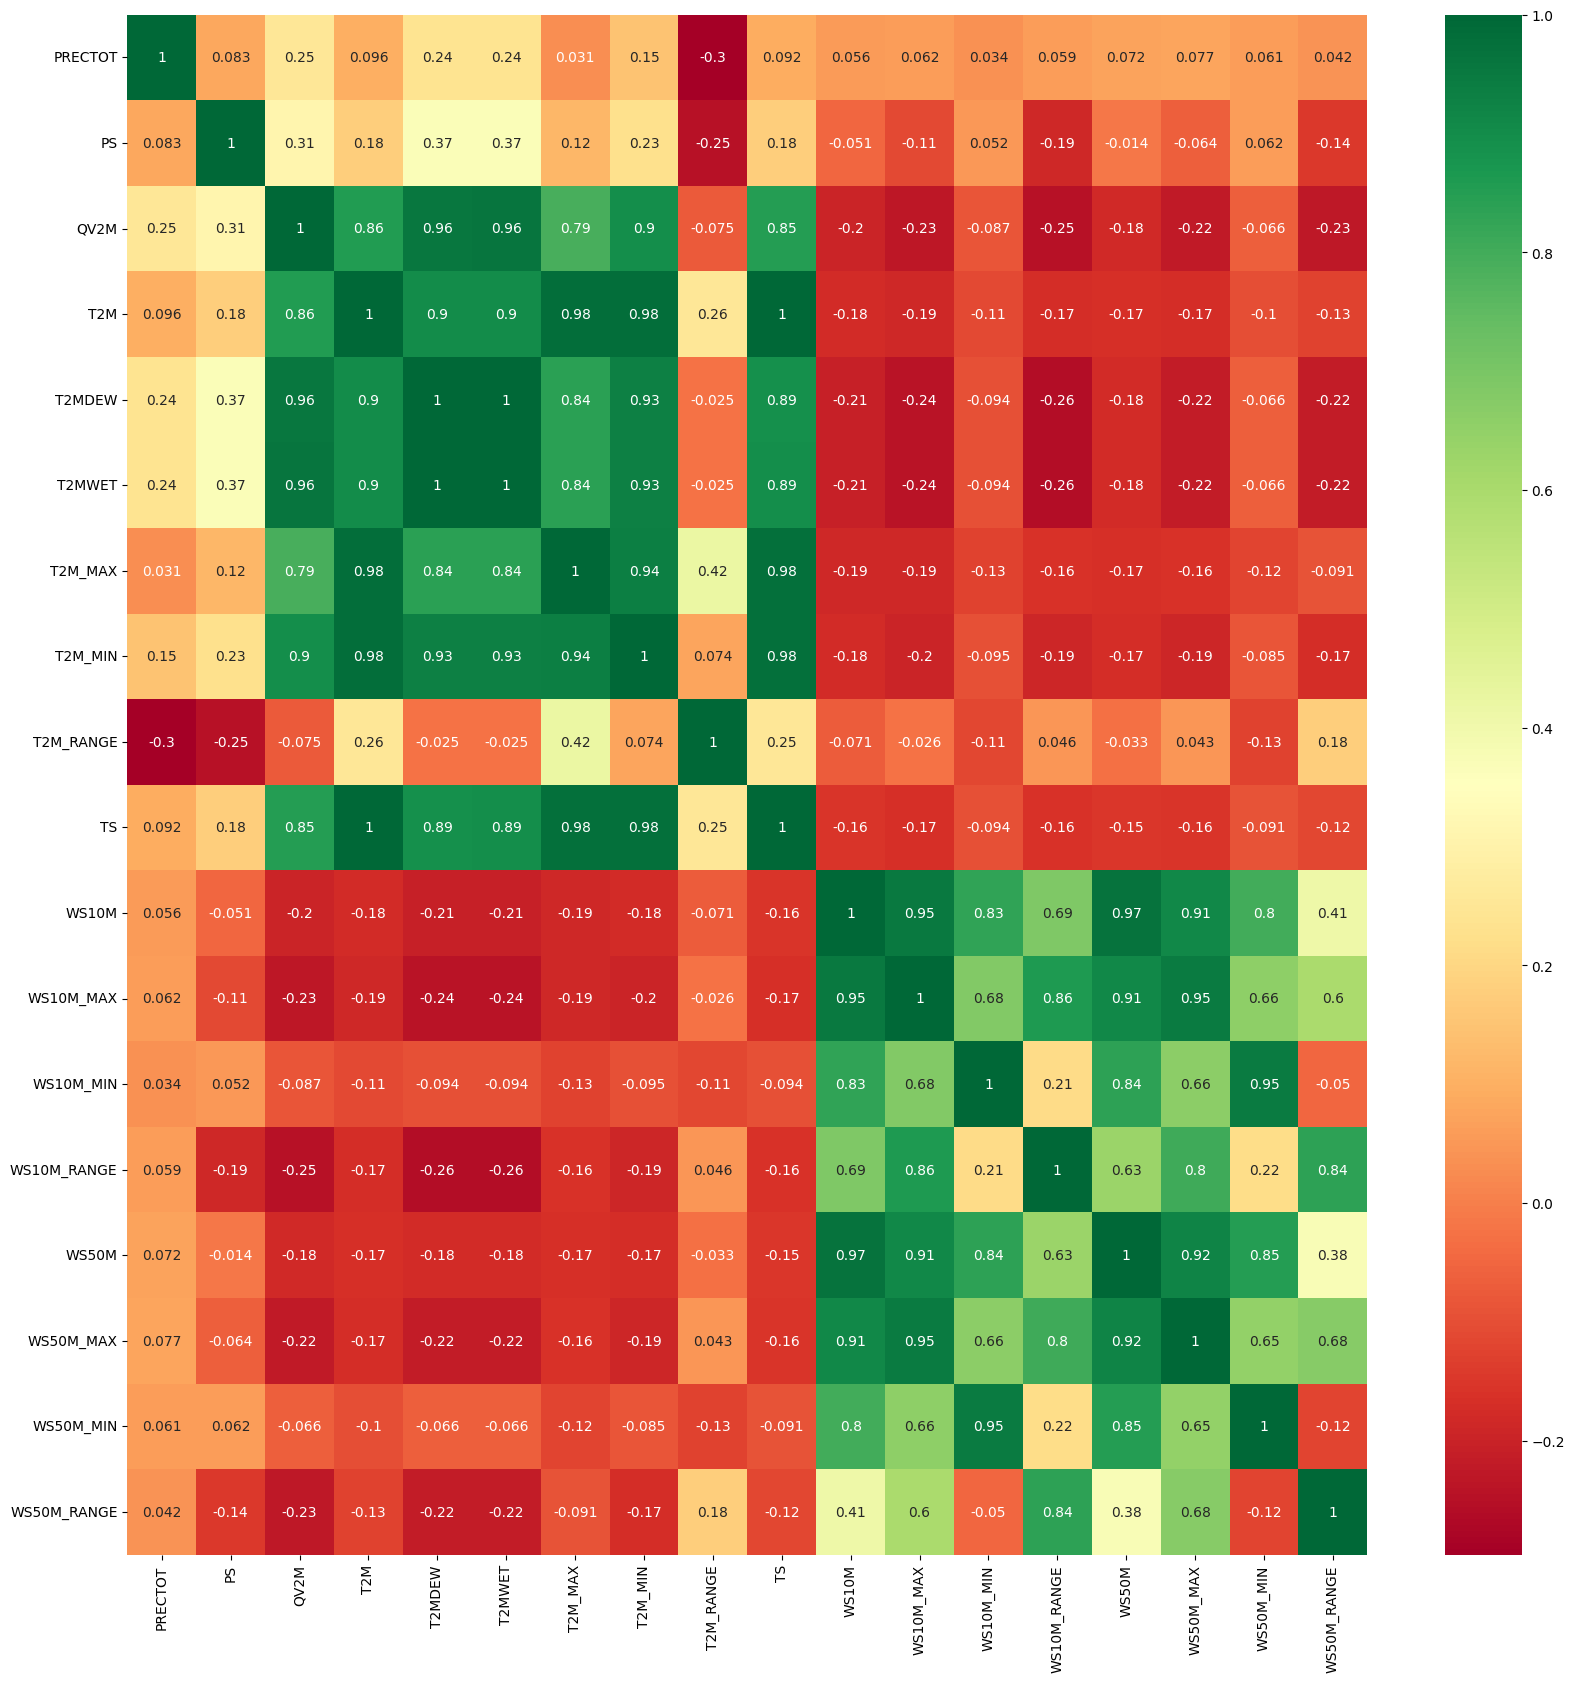

In [18]:
correlatio=data.corr()

top_corr_features = correlatio.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [19]:
# data1=data.sample(frac=.5)
# X=data1.drop(columns=['PRECTOT'],axis=1)
# y=data1['PRECTOT']



data=data.sample(frac=.2)
X=data.drop(columns=['PRECTOT'],axis=1)
y=data['PRECTOT']

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X, y)
# print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers

In [ ]:
import xgboost as xgb
data2=data.sample(200000,replace=False)

X=data2.drop(columns=['PRECTOT'],axis=1)
y=data2['PRECTOT']

#Assume you have a trained model 'model'
model = xgb.XGBRegressor()  
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Print feature importance
for i, score in enumerate(importance):
    print(f'Feature {i}: {score}')

# If you have feature names, you can display them as well
# for name, score in zip(feature_names, importance):
#     print(f'Feature {name}: {score}')

xgb.plot_importance(model)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
import xgboost as xgb

# Create a XGBoost model
model = xgb.XGBRegressor()

# Create the RFE object and rank each feature
rfe = RFE(estimator=model, n_features_to_select=3)
fit = rfe.fit(X, y)

# Print the results
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

import numpy as np

# Assuming X is a pandas DataFrame and you have feature names in it
feature_names = np.array(X.columns)

# Get the names of the selected features
selected_features = feature_names[fit.support_]

print("Selected Features: %s" % selected_features)

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Select 17 features with highest mutual information
select_feature = SelectKBest(score_func=mutual_info_regression, k=17)
fit = select_feature.fit(X, y)

In [ ]:
import numpy as np

# Assuming X is a pandas DataFrame and you have feature names in it
feature_names = np.array(X.columns)

# Get the scores of all features
scores = fit.scores_

# Get the names of the selected features
selected_features = feature_names[fit.get_support()]

# Print the scores and names of the selected features
for name, score in zip(selected_features, scores[fit.get_support()]):
    print(f'Feature {name}: {score}')

In [ ]:
data.head()

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
def decompose_series(df, var, period):
    analysis = df[var]
    decompose_result_mult = seasonal_decompose(analysis, model="additive", period=period, extrapolate_trend='freq')
    trend = decompose_result_mult.trend
    season = decompose_result_mult.seasonal
    resid = decompose_result_mult.resid
    
    return trend, season, resid


In [ ]:
tr, sea, resid=decompose_series(data, 'QV2M', 50)
pd.DataFrame({'Trend':tr,'season':sea,'residual':resid}).plot()

## ARIMA

In [ ]:
data.head()

In [ ]:

from statsmodels.tsa.stattools import adfuller

#data.index = pd.to_datetime(data.index, format='%Y-%m-%d')
data1.index = pd.to_datetime(data1.index, format='%Y-%m-%d')

# Remove duplicate index labels
data1 = data1[~data1.index.duplicated(keep='first')]
#data.index = pd.to_datetime(data.index, format='%Y')
data1=data1.resample('M').asfreq()
data1.head()


In [ ]:
# Plot average temperatures
data1['QV2M'].plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(data1['QV2M'])
print("The p-value for the ADF test is ", result[1])
print("The whole result for the ADF test is ", result)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

chg_temp = data1['QV2M'].diff()
chg_temp = chg_temp.dropna()

fig, axes = plt.subplots(2,1)

n_obs = len(chg_temp)

# Set the number of lags to the minimum of 20 or the length of the series
lags = min(8, n_obs - 1)

#  ACF
plot_acf(chg_temp, lags=lags, ax=axes[0])

# PACF
plot_pacf(chg_temp, lags=lags, ax=axes[1])
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp,order=(1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

mod_arma111 = ARIMA(chg_temp,order=(1,1,1))
res_arma111 = mod_arma111.fit()
print("The AIC for an ARMA(1,1,1) is: ", res_arma111.aic)

mod_arma211 = ARIMA(chg_temp,order=(2,1,1))
res_arma211 = mod_arma211.fit()
print("The AIC for an ARMA(2,1,1) is: ", res_arma211.aic)

mod_arma201 = ARIMA(chg_temp,order=(2,0,1))
res_arma201 = mod_arma201.fit()
print("The AIC for an ARMA(2,0,1) is: ", res_arma201.aic)

mod_arma002 = ARIMA(chg_temp,order=(0,0,2))
res_arma002 = mod_arma002.fit()
print("The AIC for an ARMA(0,0,2) is: ", res_arma002.aic)

In [ ]:
import warnings
# Turn off all warnings
warnings.filterwarnings("ignore")
pair=[]
for p in range(5):
    for q in range(5):
        for d in range(3):
            mod_arma = ARIMA(chg_temp,order=(p,d,q))
            res_arma = mod_arma.fit()
            pair.append((p,d,q,res_arma.aic,res_arma.bic))
            #print(f"AIC ARMA({p,d,q}) is: { res_arma.aic}, BIC ARMA({p,d,q}) is: { res_arma.bic}")
            

In [ ]:
optimum=min(pair,key=lambda p: p[3]+p[3])
optimum

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(data['QV2M'], trend='t', order=(2,0,4))
res = mod.fit()



In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
#fig=plt.figsize(12,10)
chg_temp.plot(ax=ax)
plot_predict(res, start='2001-01', end='2025-02', ax=ax)




one_step_forecast = res.get_prediction(start=-60)
mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower QV2M']
upper_limits = confidence_intervals.loc[:,'upper QV2M']


forcast_diff=res.get_forecast(steps=20)
#plt.plot(forcast_diff.index,forcast_diff.tvalues)

plt.plot(forcast_diff.tvalues.index,forcast_diff.tvalues.values)
#print(mean_forecast)
plt.show()
print(forcast_diff.tvalues.index)
print(forcast_diff)


In [ ]:
mod = ARIMA(data['QV2M'], trend='t', order=(2,0,4))
res = mod.fit()


plt.plot(data.index,data['QV2M'])

pred = res.get_prediction(start=-60)
#mean_forecast = one_step_forecast.predicted_mean


forcast_=res.get_forecast(steps=70)
#plt.plot(forcast_diff.index,forcast_diff.tvalues)

plt.plot(forcast_.tvalues.index,forcast_.tvalues.values)
#print(mean_forecast)
plt.show()
print(forcast_diff.tvalues.index)
print(forcast_diff)

In [ ]:
adfuller(data['QV2M'])
#data['QV2M'].plot()
ARIMA()

In [ ]:
plt.fill_between(lower_limits.index, lower_limits,upper_limits, color='pink')

In [ ]:
plot_acf(data['QV2M'])
plot_pacf(data['QV2M'])

In [ ]:
res=ARIMA(data['QV2M'],order=(2,0,4)).fit()

In [ ]:
mae=np.mean(np.abs(res.resid))
mae

In [ ]:
res=ARIMA(data['QV2M'],order=(2,0,4)).fit()
fig, ax = plt.subplots(figsize=(15, 10))
res.plot_diagnostics(fig=fig)

The model seems ok,and intuitively correct.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data['QV2M'], period=12)
decomp.plot()

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

result=pm.auto_arima(data['QV2M'],seasonal=True,D=1,max_p=5,max_q=5,trace=True,error_action='ignore',supress_warning=True,
                    start_p=0,start_q=0,start_d=0,max_d=5,start_P=1,start_Q=0,max_Q=5,max_P=5,start_D=0,max_D=5,
                     m=12,
                    information_criterion='aic',stepwise=True)


result.summary()

In [ ]:
result.plot_diagnostics()

In [ ]:
import joblib 

joblib.dump(result,'model.pkl')

# **Torch Training**

In [ ]:
# prompt: import all needed torch libraries and classes and methodes that i want to train a time series
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
data.shape

This is the RAW code. just for start the next round of run will be legit!

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def preprocess_data(data):

  data=data.drop(columns=['score','fips'])
  data=data.dropna()
  data=data.drop_duplicates()
  data.isnull().sum()

  data['date']=pd.to_datetime(data['date'])
  data=data.set_index('date')

  data=data.resample('D').mean()
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  X=scaled_data.drop(columns=['PRECTOT'],axis=1)
  y=scaled_data['PRECTOT']
  return X,y




X_test,y_test=preprocess_data(test)
X_train,y_train=preprocess_data(train)


#dataset
#dataloader

class DroughtDataset(Dataset):
  def __init__(self,X_data,y_data):
    self.X_data=X_data
    self.y_data=y_data

  def __getitem__(self,idx):
      return self.X_data[idx],self.y_data[idx]

  def __len__(self):
      return len(self.X_data)

train_dataset=DroughtDataset(torch.tensor(X_train.values),torch.tensor(y_train.values))
test_dataset=DroughtDataset(torch.tensor(X_test.values),torch.tensor(y_test.values))

batch_size=64
input_size=X_train.shape[1]
num_layers=2
hidden_size=256
output_size=1

train_dataloader=DataLoader(train_dataset,batch_size,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size,shuffle=True)



class DroughtModel(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,output_size):
    super(DroughtModel,self).__init__()
    self.hidden_size=hidden_size
    self.num_layers=num_layers
    self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
    self.linear=nn.Linear(hidden_size,256)
    self.relu=nn.ReLU()
    self.fc=nn.Linear(256,output_size)


  def forward(self,x):
    h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
    c0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

    out,_=self.lstm(x,(h0,c0))
    out=self.relu(self.linear(out[:,-1,:]))
    out=self.fc(out)
    return out

model=DroughtModel(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,output_size=output_size)



epochs=1300
learning_rate=0.001
criterion=nn.MSELoss()
optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)


model=model.to(device)
model.train()
losses=[]
for epoch in range(epochs):

  epoch_loss = 0
  for batch_idx,(data,target) in enumerate(train_dataloader):

    #data,target=torch.tensor(data.unsqueeze(1),dtype=torch.float32),torch.tensor(target,dtype=torch.float32)
    #target=target.unsqueeze(1)

    data = data.unsqueeze(1).clone().detach().requires_grad_(True).float().to(device)
    target = target.unsqueeze(1).clone().detach().float().to(device)


    output=model(data)
    loss=criterion(output,target)
    epoch_loss += loss.item()

    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
  average_epoch_loss = epoch_loss / len(train_dataloader)
  losses.append(average_epoch_loss)
  if epoch%10 == 0:
    print(f'Epoch {epoch+1}/{epochs}, Loss: {average_epoch_loss:.4f}')


import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()




In [ ]:
!pip install optuna 

In [ ]:
import optuna
import optuna.trial

import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



def preprocess_data(data):

  data=data.drop(columns=['score','fips'])
  data=data.dropna()
  data=data.drop_duplicates()
  data.isnull().sum()

  data['date']=pd.to_datetime(data['date'])
  data=data.set_index('date')

  data=data.resample('D').mean()
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  X=scaled_data.drop(columns=['PRECTOT'],axis=1)
  y=scaled_data['PRECTOT']
  return X,y




X_test,y_test=preprocess_data(test)
X_train,y_train=preprocess_data(train)


#dataset
#dataloader

class DroughtDataset(Dataset):
  def __init__(self,X_data,y_data):
    self.X_data=X_data
    self.y_data=y_data

  def __getitem__(self,idx):
      return self.X_data[idx],self.y_data[idx]

  def __len__(self):
      return len(self.X_data)

train_dataset=DroughtDataset(torch.tensor(X_train.values),torch.tensor(y_train.values))
test_dataset=DroughtDataset(torch.tensor(X_test.values),torch.tensor(y_test.values))



batch_size=64
input_size=X_train.shape[1]
num_layers=2
hidden_size=256
output_size=1

train_dataloader=DataLoader(train_dataset,batch_size,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size,shuffle=True)

In [ ]:
class CustomModel(nn.Module):
    def __init__(self, trial):
        super(CustomModel, self).__init__()
        input_size = 17
        
        n_layers_lstm = trial.suggest_int('n_layers_lstm', 1, 3)
        lstm_hidden_units = trial.suggest_int('lstm_hidden_units', 16, 128)
        lstm_type = trial.suggest_categorical('lstm_type', ['LSTM', 'GRU'])
        self.lstm_layers = []
        
        for i in range(n_layers_lstm):
            lstm_layer=getattr(nn,lstm_type)(input_size, lstm_hidden_units, batch_first=True)
            self.lstm_layers.append(lstm_layer)
            input_size=lstm_hidden_units
        self.lstm_layers=nn.ModuleList(self.lstm_layers)
        
        n_layers_fc=trial.suggest_int('n_layers_fc',1,4)
        fc_hidden_units=trial.suggest_int('fc_hidden_units',16,128)
        
        self.fc_layers=[]
        for i in range(n_layers_fc):
            fc_layer=nn.Linear(input_size,fc_hidden_units)
            self.fc_layers.append(fc_layer)
            input_size=fc_hidden_units
            
        self.fc_layers=nn.ModuleList(self.fc_layers)
        self.output_layer=nn.Linear(input_size,1)
        
    def forward(self,x):
        for lstm_layer in self.lstm_layers:
            x = x.float()
            x,_=lstm_layer(x)
            
        #x=x[:,-1,:]
        if x.dim() == 3:  # Expected case
            x = x[:, -1, :]
        elif x.dim() == 2:  # Handle unexpected case
            x = x.unsqueeze(1) 
        for fc_layer in self.fc_layers:
            x=F.relu(fc_layer(x.float()))
        
        x=self.output_layer(x)
        return x
        
        
def objective(trial):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model=CustomModel(trial).to(device)

    #lr=trial.suggest_loguniform('lr',1e-5, 1e-1)
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop', 'AdamW'])
    batch_size=trial.suggest_int('batch_size',16,128)

    optimizer=getattr(optim,optimizer_name)(model.parameters(),lr=lr)
    criterion=nn.MSELoss()


    epochs=200
    learning_rate=0.001
    criterion=nn.MSELoss()
    optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)


    model=model.to(device)
    model.train()
    train_losses=[]
    val_losses=[]
    for epoch in range(epochs):
        train_loss = 0
        for batch_idx,(data,target) in enumerate(train_dataloader):

        #data,target=torch.tensor(data.unsqueeze(1),dtype=torch.float32),torch.tensor(target,dtype=torch.float32)
        #target=target.unsqueeze(1)

            data = data.unsqueeze(1).clone().detach().requires_grad_(True).float().to(device)
            target = target.unsqueeze(1).clone().detach().float().to(device)


            output=model(data)
            loss=criterion(output,target)
            train_loss += loss.item()

            #train_losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        average_epoch_loss = train_loss / len(train_dataloader)
        train_losses.append(average_epoch_loss)
        if epoch%10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {average_epoch_loss:.4f}')



        model.eval()
        val_loss = 0.0
        val_losses=[]
        with torch.no_grad():
            for X_batch, y_batch in test_dataloader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                predictions = model(X_batch).to(device)
                loss = criterion(predictions, y_batch)
                val_loss += loss.item()
        #val_loss /= len(test_loader)
        average_val_loss = val_loss / len(test_dataloader)
        val_losses.append(average_epoch_loss)
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {average_val_loss:.4f}')

        return val_losses[-1]


In [ ]:
import warnings
warnings.filterwarnings('ignore')


study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=50)

print('Best trial:')
trial = study.best_trial

print(f'  Value: {trial.value}')
print('  Params:')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

Best trial:

  Value: 0.01221117748384725
  
  Params:
  
    n_layers_lstm: 1
    
    lstm_hidden_units: 94
    
    lstm_type: GRU
    
    n_layers_fc: 1
    
    fc_hidden_units: 91
    
    lr: 0.016898981899120185
    
    optimizer: RMSprop
    
    batch_size: 27

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


class EarlyStopping():
    def __init__(self, patience=5, min_delta=0, verbose=False):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model_state = None
        
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
            
        else:
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        
    def load_best_model(self, model):
        if self.best_model_state is not None:
            model.load_state_dict(self.best_model_state)

early_stopping = EarlyStopping(patience=4, verbose=True)
        



def preprocess_data(data):

  data=data.drop(columns=['score','fips'])
  data=data.dropna()
  data=data.drop_duplicates()
  data.isnull().sum()

  data['date']=pd.to_datetime(data['date'])
  data=data.set_index('date')

  data=data.resample('D').mean()
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  X=scaled_data.drop(columns=['PRECTOT'],axis=1)
  y=scaled_data['PRECTOT']
  return X,y




X_test,y_test=preprocess_data(test)
X_train,y_train=preprocess_data(train)


#dataset
#dataloader

class DroughtDataset(Dataset):
  def __init__(self,X_data,y_data):
    self.X_data=X_data
    self.y_data=y_data

  def __getitem__(self,idx):
      return self.X_data[idx],self.y_data[idx]

  def __len__(self):
      return len(self.X_data)

train_dataset=DroughtDataset(torch.tensor(X_train.values),torch.tensor(y_train.values))
test_dataset=DroughtDataset(torch.tensor(X_test.values),torch.tensor(y_test.values))

batch_size=27
input_size=X_train.shape[1]
num_layers=1
hidden_size=91
output_size=1

train_dataloader=DataLoader(train_dataset,batch_size,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size,shuffle=True)



class DroughtModel(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,output_size):
        super(DroughtModel,self).__init__()
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.gru=nn.GRU(input_size,hidden_size,num_layers,batch_first=True)
        self.linear=nn.Linear(hidden_size,output_size)
        self.relu=nn.ReLU()
        #self.fc=nn.Linear(hidden_size,output_size)


    def forward(self,x):
        h0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)
        c0=torch.zeros(self.num_layers,x.size(0),self.hidden_size).to(device)

        out,_=self.gru(x,h0)
        out=self.linear(out[:,-1,:])
        #out=self.fc(out)
        return out

model=DroughtModel(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,output_size=output_size)



epochs=1200
learning_rate=0.016898981899120185
criterion=nn.MSELoss()
#optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)
optimizer=torch.optim.RMSprop(model.parameters(),lr=learning_rate)


model=model.to(device)
model.train()
losses=[]
for epoch in range(epochs):

    epoch_loss = 0
    for batch_idx,(data,target) in enumerate(train_dataloader):

        #data,target=torch.tensor(data.unsqueeze(1),dtype=torch.float32),torch.tensor(target,dtype=torch.float32)
        #target=target.unsqueeze(1)

        data = data.unsqueeze(1).clone().detach().requires_grad_(True).float().to(device)
        target = target.unsqueeze(1).clone().detach().float().to(device)


        output=model(data)
        loss=criterion(output,target)
        epoch_loss += loss.item()

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
    average_epoch_loss = epoch_loss / len(train_dataloader)
    losses.append(average_epoch_loss)
    if epoch%10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {average_epoch_loss:.4f}')

early_stopping(val_loss, model)
if early_stopping.early_stop:
    print("Early stopping")
    break

# Load the best model (optional)
early_stopping.load_best_model(model)

import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()




In [ ]:
torch.save(model,'model.pth')

In [ ]:
pred_model=torch.load('model.pth')

In [ ]:
pred_model.eval()

epochs=20
predictions=[]

with torch.no_grad():
    for data,target in test_dataloader:
        predictions.append(pred_model(data.unsqueeze(0).to(device).float()))
        #print(data.shape)
        
predictions = torch.cat(predictions, dim=0) 
predictions